In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
reg= pd.read_csv("C:/Users/cali_/Downloads/archive (1)/framingham.csv")
reg.dropna(axis=0, inplace=True)
X=reg.iloc[:,:-1].values
y=reg.iloc[:,-1].values
reg.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [29]:
reg.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [31]:
reg_1=reg[reg['TenYearCHD']==1]
reg_2=reg[reg['TenYearCHD']==0]
print(reg_1['glucose'].mean()-reg_2['glucose'].mean())

8.11229544713271


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

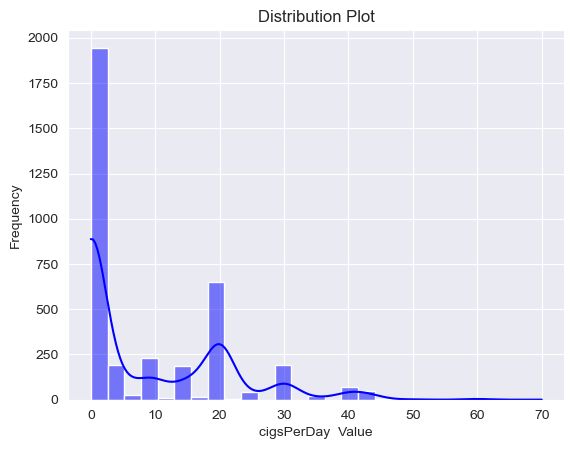

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = reg.cigsPerDay 

# Create a distribution plot
sns.histplot(data, kde=True, color='blue')

# Add labels and title
plt.xlabel('cigsPerDay  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [37]:
median_value_cigsPerDay = reg['cigsPerDay'].median()

print("Median:", median_value_cigsPerDay)

Median: 0.0


In [39]:
reg['cigsPerDay'].fillna(median_value_cigsPerDay , inplace=True)

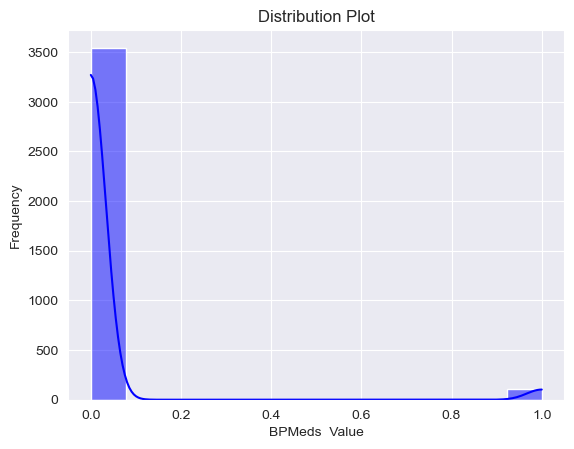

In [41]:
data = reg.BPMeds

# Create a distribution plot
sns.histplot(data, kde=True, color='blue')

# Add labels and title
plt.xlabel('BPMeds  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [43]:
reg["BPMeds"].fillna(0,inplace=True)

In [44]:
reg.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

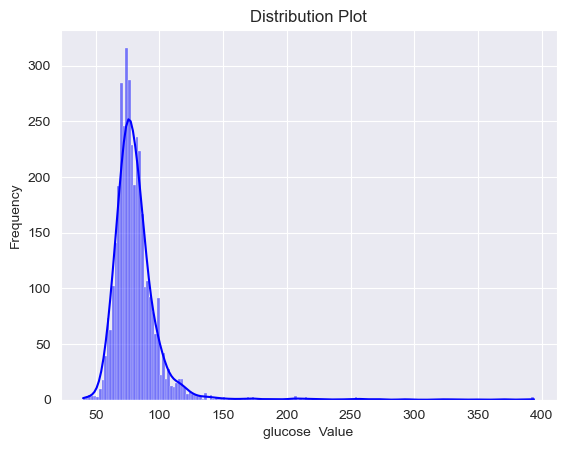

In [46]:
data = reg.glucose

# Create a distribution plot
sns.histplot(data, kde=True, color='blue')

# Add labels and title
plt.xlabel('glucose  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [51]:
df_cleaned = reg.dropna(subset=['glucose','BMI'])
df_cleaned.shape

(3656, 16)

In [52]:
correlation_matrix = df_cleaned.corr()
correlation_matrix

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


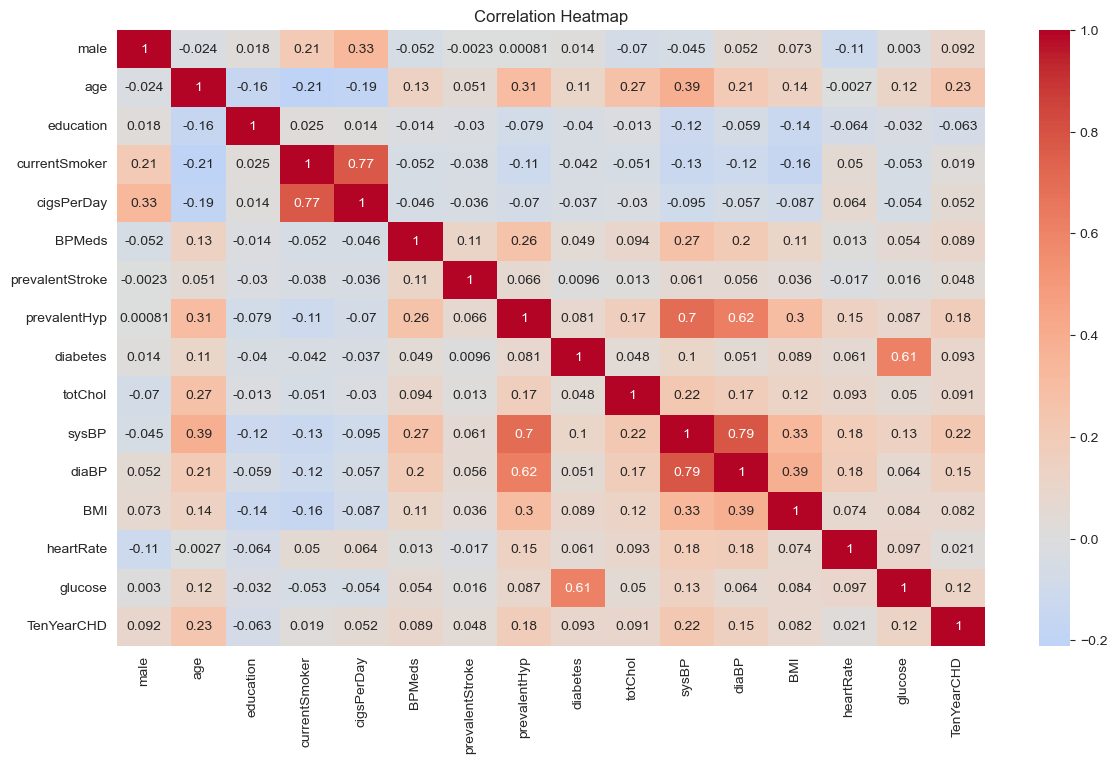

In [53]:
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()